# Comparison of performance with standard property features v. alternative data

Following alternative data was added to the training data:

- Green space score
- Noise pollution score
- Distance to centre score
- Crime statistics score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import landsat_pipeline as lp
import time
import os
import seaborn as sns
from model_testing import run_test

In [4]:
df = pd.read_csv("data//train_data//funda_sample_ams_geocoded_gs_ns_circ_dtc_ss.csv",index_col=0)

Text(0.5, 1.0, 'Distribution of Safety Score')

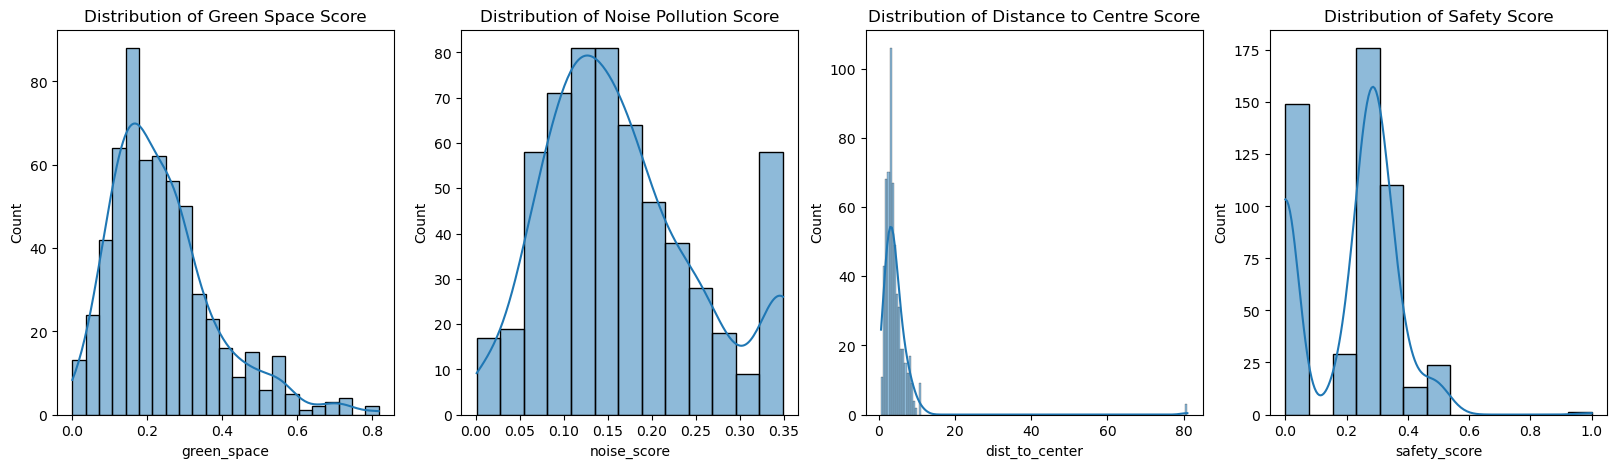

In [22]:
fig,ax = plt.subplots(1,4, figsize=(20,5))

sns.histplot(df["green_space"],kde=True,ax=ax[0])
sns.histplot(df["noise_score"],kde=True,ax=ax[1])
sns.histplot(df["dist_to_center"],kde=True,ax=ax[2])
sns.histplot(df["safety_score"],kde=True,ax=ax[3])

ax[0].set_title("Distribution of Green Space Score")
ax[1].set_title("Distribution of Noise Pollution Score")
ax[2].set_title("Distribution of Distance to Centre Score")
ax[3].set_title("Distribution of Safety Score")

In [5]:
r2_scores_gs_ns,rmses_gs_ns,mae_gs_ns,mses_gs_ns = run_test("data//train_data//funda_sample_ams_geocoded_gs_ns_circ_dtc_ss.csv")
r2_scores_gs,rmses_gs,mae_gs,mses_gs = run_test("data//train_data//funda_sample_ams_geocoded_gs_ns_circ_dtc.csv")
r2_scores,rmses,maes,mses = run_test("data//train_data//funda_sample_ams_geocoded.csv")

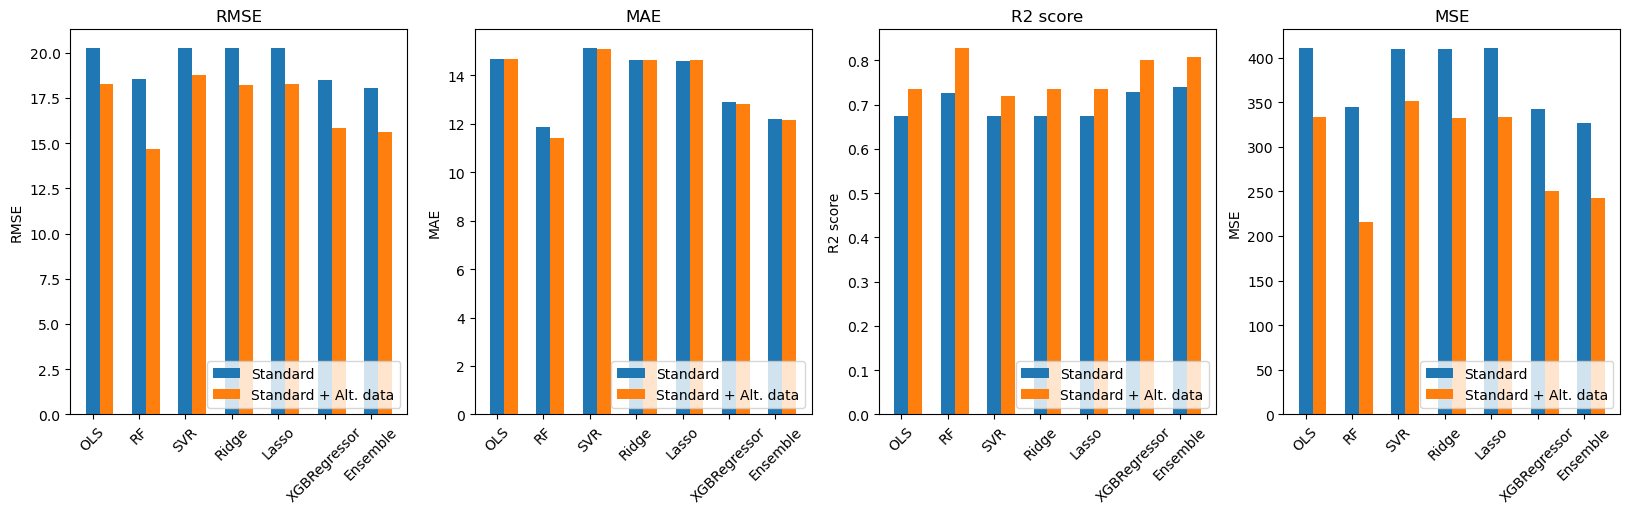

In [6]:
names = ["OLS","RF","SVR","Ridge","Lasso","XGBRegressor","Ensemble"]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
indexes = np.arange(len(names))
bar_width = 0.3
gap_width = 0.0
w=0.3
ax[0].bar(indexes, rmses, bar_width, label="Standard")
ax[0].bar(indexes+w, rmses_gs_ns, bar_width, label="Standard + Alt. data")

ax[0].set_xticks(indexes)

ax[1].bar(indexes,mae_gs, bar_width, label="Standard")
ax[1].bar(indexes+w, mae_gs_ns, bar_width, label="Standard + Alt. data")

ax[1].set_xticks(indexes)

ax[2].bar(indexes, r2_scores, bar_width, label="Standard")
ax[2].bar(indexes+w, r2_scores_gs_ns, bar_width, label="Standard + Alt. data")

ax[2].set_xticks(indexes)

ax[3].bar(indexes, mses, bar_width, label="Standard")
ax[3].bar(indexes+w, mses_gs_ns, bar_width, label="Standard + Alt. data")

ax[3].set_xticks(indexes)


ax[0].set_title("RMSE")
ax[1].set_title("MAE")
ax[2].set_title("R2 score")
ax[3].set_title("MSE")

ax[0].set_xticklabels(names, rotation=45)
ax[1].set_xticklabels(names, rotation=45)
ax[2].set_xticklabels(names, rotation=45)
ax[3].set_xticklabels(names, rotation=45)

ax[0].set_ylabel("RMSE")
ax[1].set_ylabel("MAE")
ax[2].set_ylabel("R2 score")
ax[3].set_ylabel("MSE")

ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
ax[2].legend(loc="lower right")
ax[3].legend(loc="lower right")

plt.show()

### Improvements in Metrics

|      |         OLS |          RF |         SVR |       Ridge |       Lasso |   XGBRegressor |    Ensemble |
|:-----|------------:|------------:|------------:|------------:|------------:|---------------:|------------:|
| R_2  |   0.0614355 |    0.102336 |   0.0461379 |   0.0613293 |   0.0613313 |       0.073354 |   0.0663784 |
| RMSE |  -2.00729   |   -3.8737   |  -1.48956   |  -2.00548   |  -2.00291   |      -2.6895   |  -2.48188   |
| MAE  |  -0.942192  |   -2.64996  |  -0.151421  |  -1.02789   |  -1.00333   |      -2.17259  |  -1.84276   |
| MSE  | -77.3232    | -128.801    | -58.0695    | -77.1895    | -77.1921    |     -92.3239   | -83.5444    |

In [10]:
imporv_dict = {
    "R_2" : np.array(r2_scores_gs_ns)-np.array(r2_scores),
"RMSE" : np.array(rmses_gs_ns)-np.array(rmses),
"MAE" : np.array(mae_gs_ns)-np.array(maes),
"MSE" : np.array(mses_gs_ns)-np.array(mses)
}


In [11]:
result_df = pd.DataFrame(imporv_dict,index=names)

In [16]:
# print(result_df.T.to_markdown())

|      |         OLS |          RF |         SVR |       Ridge |       Lasso |   XGBRegressor |    Ensemble |
|:-----|------------:|------------:|------------:|------------:|------------:|---------------:|------------:|
| R_2  |   0.0614355 |    0.102336 |   0.0461379 |   0.0613293 |   0.0613313 |       0.073354 |   0.0663784 |
| RMSE |  -2.00729   |   -3.8737   |  -1.48956   |  -2.00548   |  -2.00291   |      -2.6895   |  -2.48188   |
| MAE  |  -0.942192  |   -2.64996  |  -0.151421  |  -1.02789   |  -1.00333   |      -2.17259  |  -1.84276   |
| MSE  | -77.3232    | -128.801    | -58.0695    | -77.1895    | -77.1921    |     -92.3239   | -83.5444    |
